In [2]:
import random
import sys
sys.path.append('..')
from mne.viz import plot_topomap
from spatialFilters import TDCA
import mne
import os
import numpy as np
import pickle


/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  long_ = _make_signed(np.long)


In [3]:
expName = 'sweep'
dir = '../datasets/%s.pickle' % expName
with open(dir, "rb") as fp:
    wholeset = pickle.load(fp)

sub = -1
chNames = wholeset[sub]['channel']
X = wholeset[sub]['wn']['X']
y = wholeset[sub]['wn']['y']

chnINX = [chNames.index(i) for i in chNames if i not in ['M1','M2','CB1','CB2']]
X = X[:, chnINX]
for i in ['M1','M2','CB1','CB2']:
    chNames.remove(i)
wholeset[sub]['name']

'zhangtiantian'

In [4]:
Add = 'Alpha-S1.mat'
from scipy.io import loadmat
X = loadmat(Add)['data'][0][0]['data']
_, _, classNUM, blockNUM = X.shape

X = X[chnINX, 125:]
X = X.transpose((-2, -1, 0, 1))
X = np.concatenate(X, axis=0)
y = np.repeat(np.arange(0, classNUM), blockNUM)

In [5]:
info = mne.create_info(ch_names=chNames, sfreq=250,ch_types='eeg')
fname = 'montage.loc'
montage = mne.channels.read_custom_montage(fname)
info.set_montage(montage)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 60 EEG
 custom_ref_applied: False
 dig: 63 items (3 Cardinal, 60 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 60
 projs: []
 sfreq: 250.0 Hz
>

In [6]:
model = TDCA(srate=250,montage=40,lag=0.14,winLEN=3)
model.fit(X,y)
pattern = np.squeeze(model.pattern)

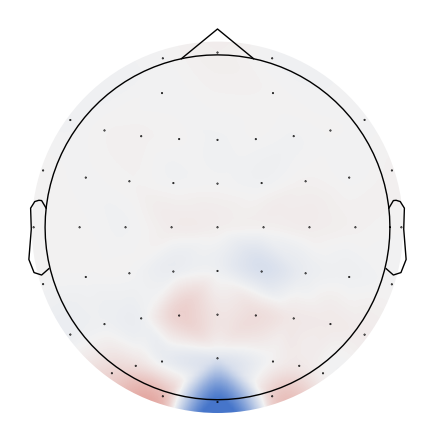

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

m = sns.diverging_palette(255, 15, as_cmap=True)

f,ax = plt.subplots()
ax2 = plot_topomap(data=bigPattern, pos=info, cmap=m,
                   contours=0, axes=ax, show=False)
